# Test07

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage import draw
from scipy import signal
from PIL import Image

In [2]:
global_factor = 4

def image_open(name):
    location='from_camera/test07/'+name+'.png'
    image_im = Image.open(location)
    realsize=image_im.size
    newsize=tuple(int(ti/global_factor) for ti in realsize)
    image_im=image_im.resize(newsize,Image.ANTIALIAS)
    image_im = np.array(image_im,dtype=float)
    image_im = image_im[:, :, 0]
    return image_im

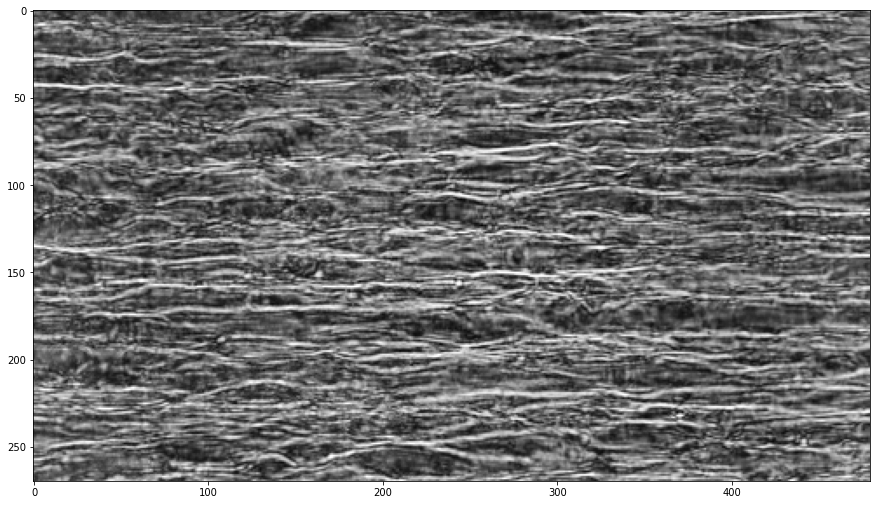

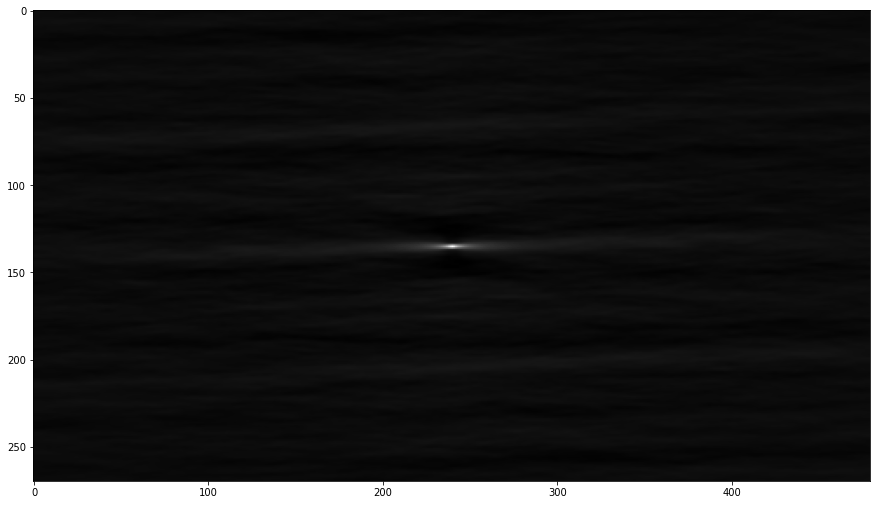

In [3]:
h = image_open('h')
h -= h.mean()
plt.figure(figsize=(15,15))
plt.imshow(h,cmap='gray')
plt.show()

plt.figure(figsize=(15,15))
plt.imshow(signal.fftconvolve(h,np.flip(h),mode='same'),cmap='gray')
plt.show()

In [4]:
blackscreen=image_open('black')

def estimation(name):
    imag=image_open(name)
    imag_hat=signal.fftconvolve(imag-blackscreen,np.flip(h),mode='same')
    plt.imshow(imag_hat,cmap='gray')
    plt.title(name)
    plt.show()
    return imag_hat

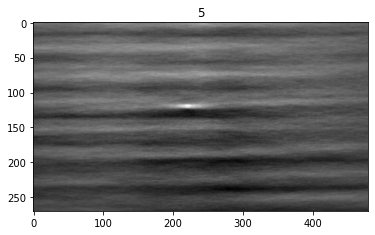

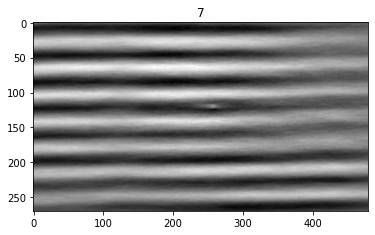

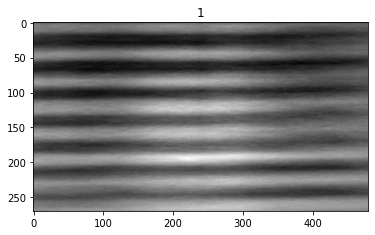

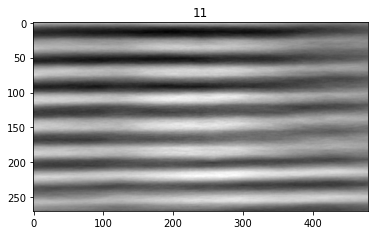

In [13]:
dotcenter = estimation('5')
dotcenter = estimation('7')
dotcenter = estimation('1')
dotcenter = estimation('11')